In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("House Price India.csv")
type(df)

pandas.core.frame.DataFrame

In [11]:
df.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
5,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
6,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
7,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000
8,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,...,1955,0,122009,52.8014,-114.598,2010,6550,1,73,750000
9,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,...,1920,0,122010,52.9145,-114.391,2320,10814,2,53,698000


In [13]:
df.shape

(14620, 23)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14620.0,6.762821e+09,6237.574799,6.762810e+09,6.762815e+09,6.762821e+09,6.762826e+09,6.762832e+09
Date,14620.0,4.260454e+04,67.347991,4.249100e+04,4.254600e+04,4.260000e+04,4.266200e+04,4.273400e+04
number of bedrooms,14620.0,3.379343e+00,0.938719,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
number of bathrooms,14620.0,2.129583e+00,0.769934,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living area,14620.0,2.098263e+03,928.275721,3.700000e+02,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
lot area,14620.0,1.509328e+04,37919.621304,5.200000e+02,5.010750e+03,7.620000e+03,1.080000e+04,1.074218e+06
number of floors,14620.0,1.502360e+00,0.540239,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront present,14620.0,7.660739e-03,0.087193,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
number of views,14620.0,2.331053e-01,0.766259,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition of the house,14620.0,3.430506e+00,0.664151,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [19]:
#Total unique values in each column
df.nunique()

id                                       14620
Date                                       241
number of bedrooms                          12
number of bathrooms                         29
living area                                865
lot area                                  7451
number of floors                             6
waterfront present                           2
number of views                              5
condition of the house                       5
grade of the house                          10
Area of the house(excluding basement)      781
Area of the basement                       280
Built Year                                 116
Renovation Year                             68
Postal Code                                 70
Lattitude                                 4662
Longitude                                  716
living_area_renov                          665
lot_area_renov                            6835
Number of schools nearby                     3
Distance from

In [21]:
import pandas as pd

# Assuming df is your DataFrame and 'price' is the column of interest
unique_prices = df['Price'].unique()

print("Unique values in 'price':")
print(unique_prices)
print(f"Total unique values: {len(unique_prices)}")

Unique values in 'price':
[2380000 1400000 1200000 ...  221700  219200  146000]
Total unique values: 2901


In [23]:
#calculates the total missing value and its percentage
total = df.isnull().sum().sort_values(ascending=False)
percentage= df.isnull().sum()/df.isnull().count()*100
missing_data = pd.concat([total, percentage], axis=1, keys=['Total Missing Values', 'Percentage'])
missing_data

,Total Missing Values,Percentage
id,0,0.0
Area of the basement,0,0.0
Distance from the airport,0,0.0
Number of schools nearby,0,0.0
lot_area_renov,0,0.0
living_area_renov,0,0.0
Longitude,0,0.0
Lattitude,0,0.0
Postal Code,0,0.0
Renovation Year,0,0.0


The Above result shows us that there are no Null Values in our Dataset.

In [26]:
#Total sum of duplicate values

df.duplicated().sum()


0

In [28]:
#We are now dropping the columns 'ID' and 'Date' because they are unnecesary for our program
df = df.drop(columns=['id','Date'])

In [30]:
#We are making a function to rename all the remaining columns by replaceing their spaces with '_'
#so that when we are running models with our new DataFrame we won't run into issues.
def rename_columns(columns):
    return columns.lower().replace(' ','_')

df.rename(columns=rename_columns, inplace=True)

df.columns

Index(['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'number_of_floors', 'waterfront_present', 'number_of_views',
       'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'price'],
      dtype='object')

In [32]:
df['price']

0        2380000
1        1400000
2        1200000
3         838000
4         805000
          ...   
14615     221700
14616     219200
14617     209000
14618     205000
14619     146000
Name: price, Length: 14620, dtype: int64

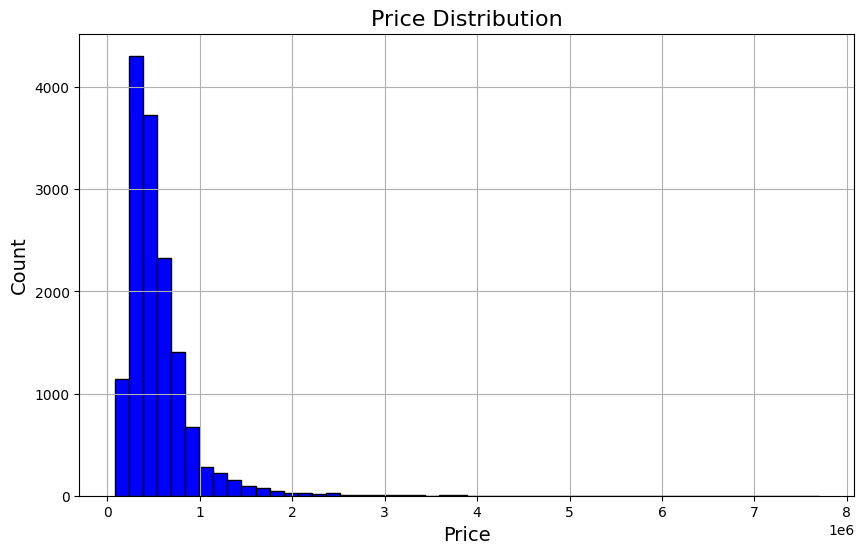

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'price' is the column of interest
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='blue', edgecolor='black')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

In [36]:
import numpy as np
import pandas as pd

# List of features for which we want to remove outliers
features_to_clean = [
    'number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
    'number_of_floors', 'condition_of_the_house', 'grade_of_the_house',
    'area_of_the_house(excluding_basement)', 'area_of_the_basement',
    'built_year', 'postal_code', 'lattitude',
    'longitude', 'living_area_renov', 'lot_area_renov',
    'number_of_schools_nearby', 'distance_from_the_airport'
]

def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Store original price statistics
original_price_min = df['price'].min()
original_price_max = df['price'].max()
original_price_values = df['price'].unique()

# Remove outliers from the specified features
df_cleaned = remove_outliers_iqr(df, features_to_clean)

# Display the shape of the dataframe before and after cleaning
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

# Verify if 'price' values changed
cleaned_price_min = df_cleaned['price'].min()
cleaned_price_max = df_cleaned['price'].max()
cleaned_price_values = df_cleaned['price'].unique()

print(f"Original price min: {original_price_min}, max: {original_price_max}")
print(f"Cleaned price min: {cleaned_price_min}, max: {cleaned_price_max}")
print(f"Original unique price values: {original_price_values}")
print(f"Cleaned unique price values: {cleaned_price_values}")

# Display the first few rows of the cleaned dataframe
df_cleaned.head()

Original shape: (14620, 21)
Cleaned shape: (10560, 21)
Original price min: 78000, max: 7700000
Cleaned price min: 82000, max: 2000000
Original unique price values: [2380000 1400000 1200000 ...  221700  219200  146000]
Cleaned unique price values: [1400000 1200000  805000 ...  614285  219200  146000]


,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,grade_of_the_house,area_of_the_house(excluding_basement),...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
5,3,2.50,2600,4750,1.0,0,0,4,9,1700,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
7,3,1.75,2240,10578,2.0,0,0,5,8,1550,...,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000


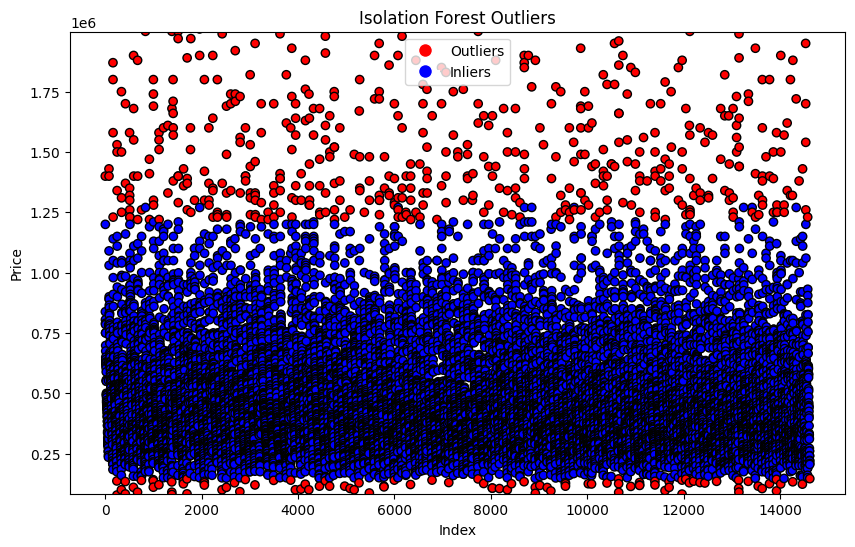

Minimum price: 82000
Maximum price: 2000000


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Assuming df is your DataFrame and 'price' is the column of interest
# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)
outlier_scores = iso_forest.fit_predict(df[['price']])

# Define colors based on outlier scores
colors = ['red' if score == -1 else 'blue' for score in outlier_scores]

# Determine the y-axis limits based on the 5th and 95th percentiles
y_min = df_cleaned['price'].quantile(0.00005)
y_max = df_cleaned['price'].quantile(0.999999)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['price'], c=colors, edgecolor='k')
plt.ylim([y_min, y_max])  # Set y-axis limits
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Isolation Forest Outliers')

# Adding legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Outliers'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Inliers')
]
plt.legend(handles=handles)
plt.show()

# Check the minimum and maximum price in the original data
min_price = df_cleaned['price'].min()
max_price = df_cleaned['price'].max()

print(f"Minimum price: {min_price}")
print(f"Maximum price: {max_price}")

In [39]:
df['price']

0        2380000
1        1400000
2        1200000
3         838000
4         805000
          ...   
14615     221700
14616     219200
14617     209000
14618     205000
14619     146000
Name: price, Length: 14620, dtype: int64

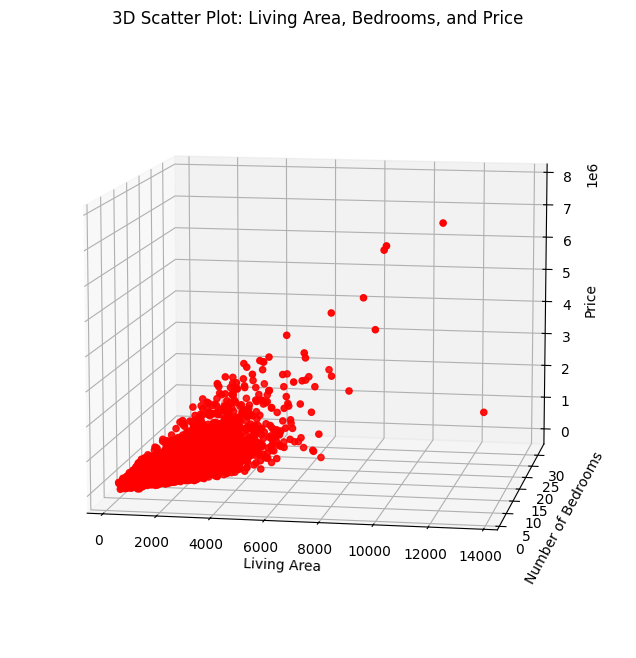

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['living_area'], df['number_of_bedrooms'], df['price'], c='r', marker='o')
ax.view_init(elev=10, azim=280)  # Adjust elev and azim to change orientation
ax.set_xlabel('Living Area')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price')
plt.title('3D Scatter Plot: Living Area, Bedrooms, and Price')
plt.show()

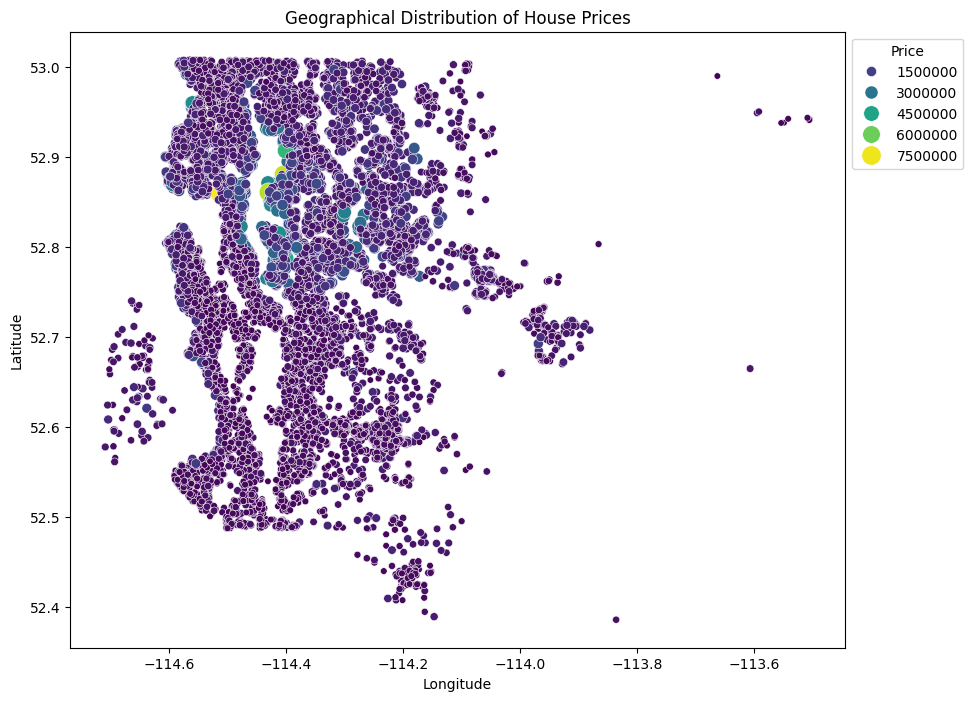

In [44]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='lattitude', hue='price', data=df, palette='viridis', size='price', sizes=(20, 200))
plt.title('Geographical Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

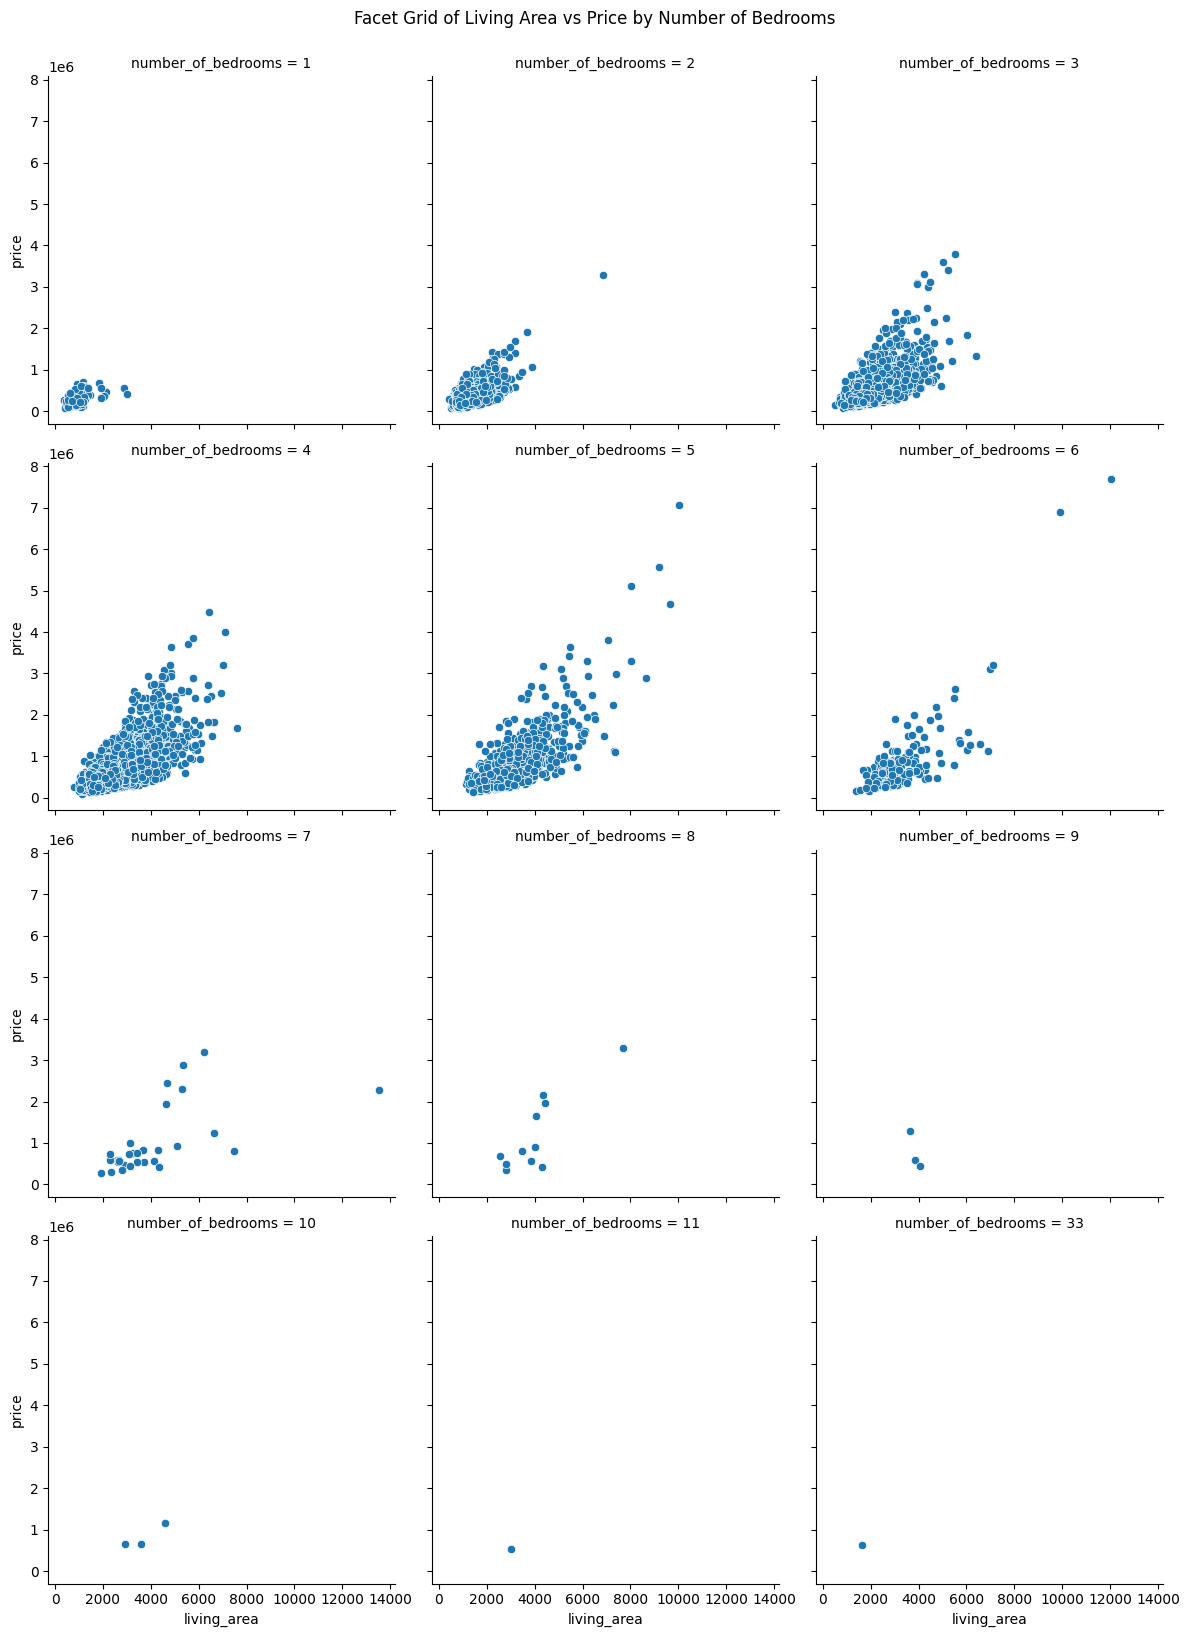

In [46]:
g = sns.FacetGrid(df, col='number_of_bedrooms', col_wrap=3, height=4)
g.map(sns.scatterplot, 'living_area', 'price')
g.fig.suptitle('Facet Grid of Living Area vs Price by Number of Bedrooms', y=1.02)
plt.show()

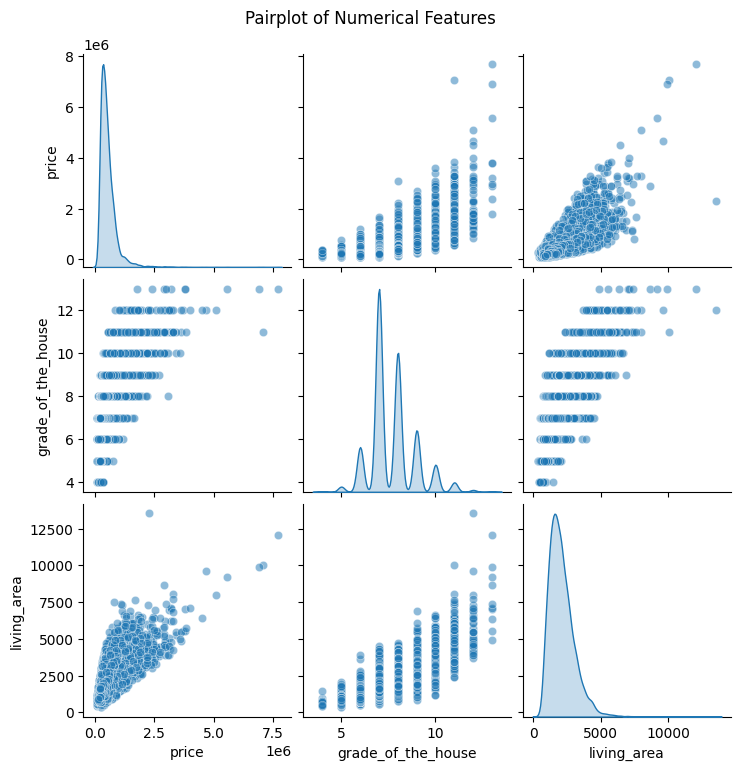

In [47]:
#From the Correlation Matrix we are doing a Pairplot of the Highly Correlated Values with 'Price'

# Specify the columns you want to include in the pairplot
selected_columns = ['price', 'grade_of_the_house', 'living_area']

# Create a new DataFrame with the selected columns
df_selected = df[selected_columns]

# Assuming df is your DataFrame
sns.pairplot(df_selected, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [48]:
unique_prices = df['price'].unique()
unique_prices 

array([2380000, 1400000, 1200000, ...,  221700,  219200,  146000],
      dtype=int64)

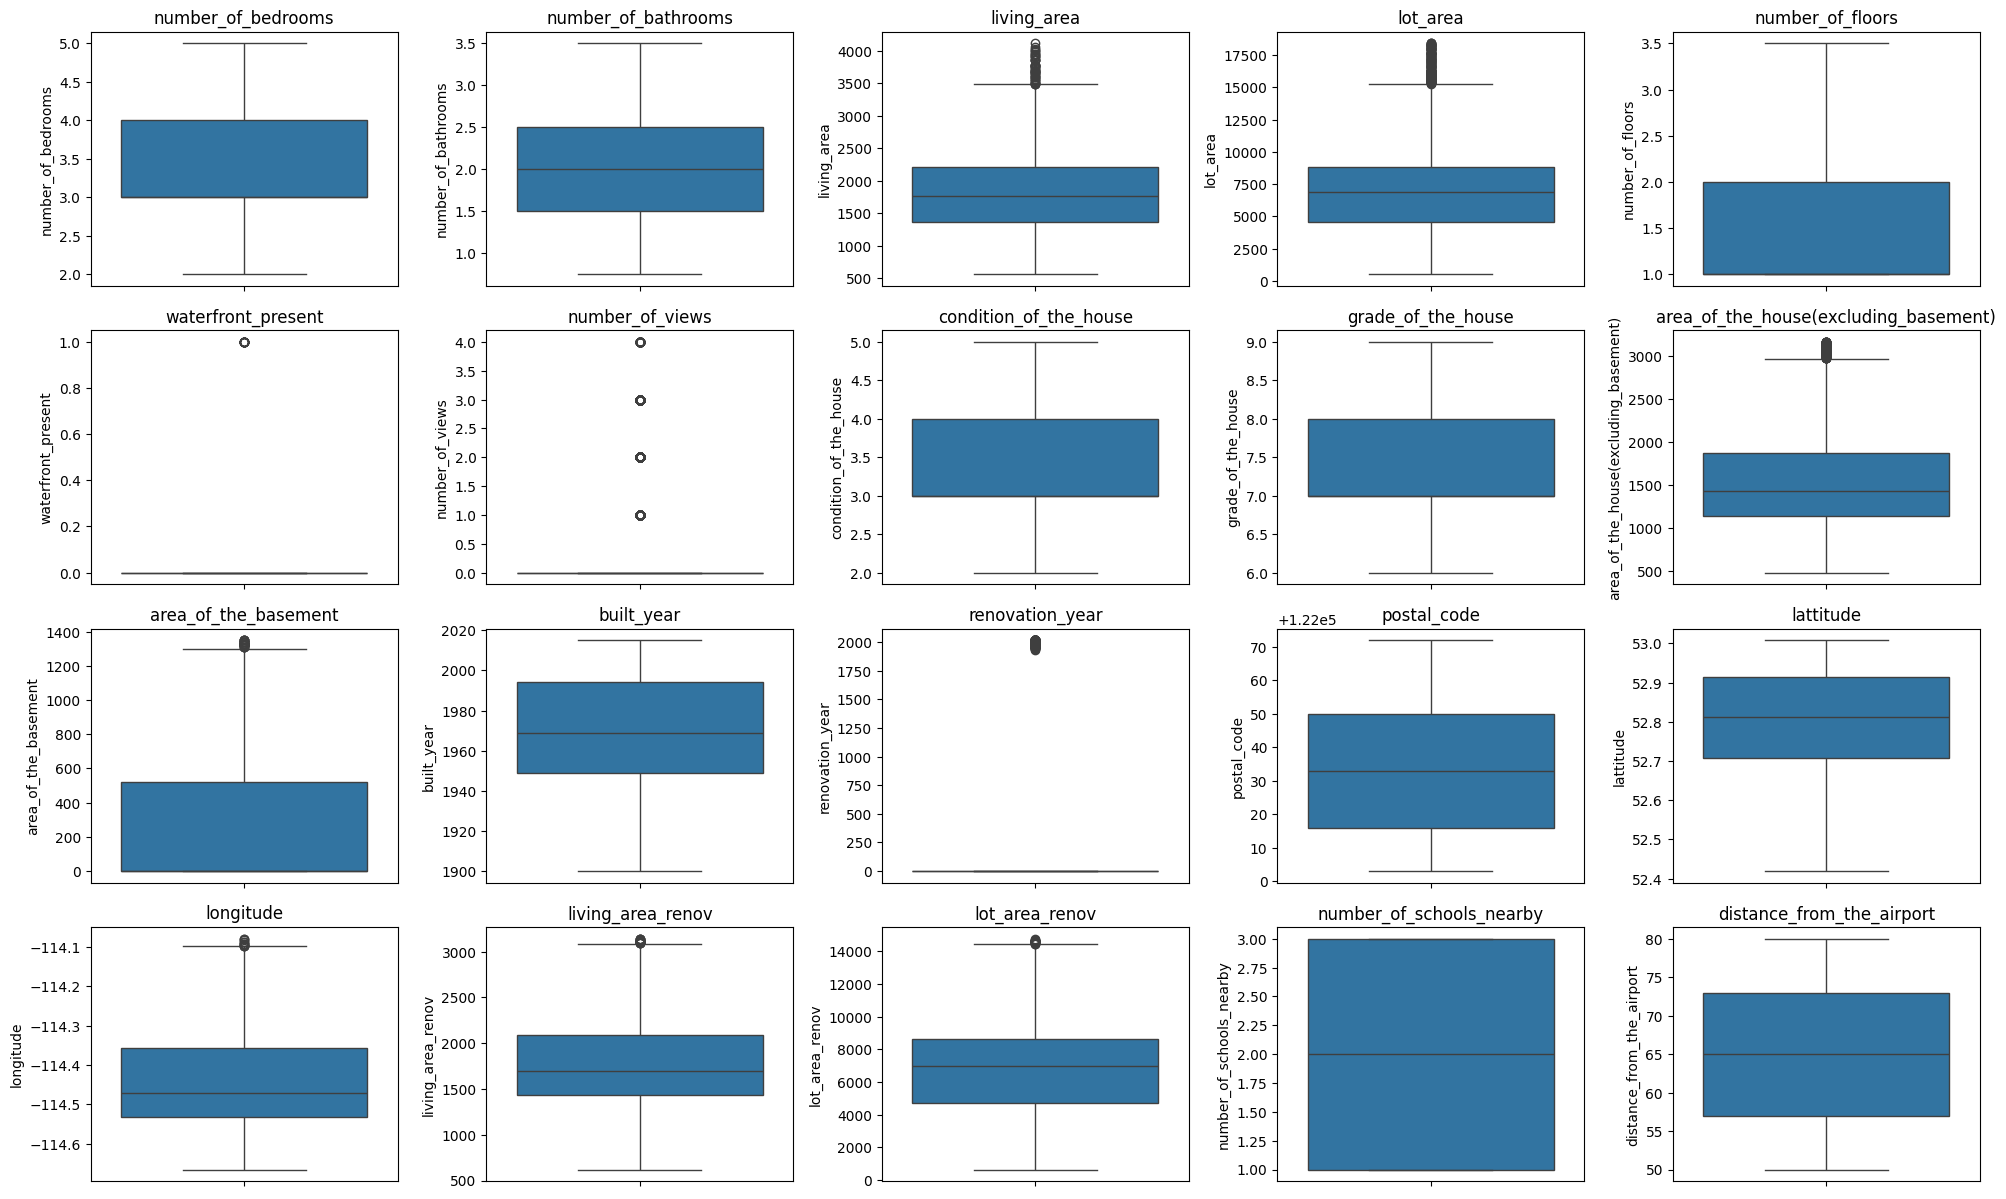

In [49]:
# List of features for the box plot
features = [
    'number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
    'number_of_floors', 'waterfront_present', 'number_of_views',
    'condition_of_the_house', 'grade_of_the_house',
    'area_of_the_house(excluding_basement)', 'area_of_the_basement',
    'built_year', 'renovation_year', 'postal_code', 'lattitude',
    'longitude', 'living_area_renov', 'lot_area_renov',
    'number_of_schools_nearby', 'distance_from_the_airport'
]
# Create a box plot for each feature
plt.figure(figsize=(20, 15))

# Iterate over the features and create a box plot for each
for i, feature in enumerate(features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df_cleaned[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

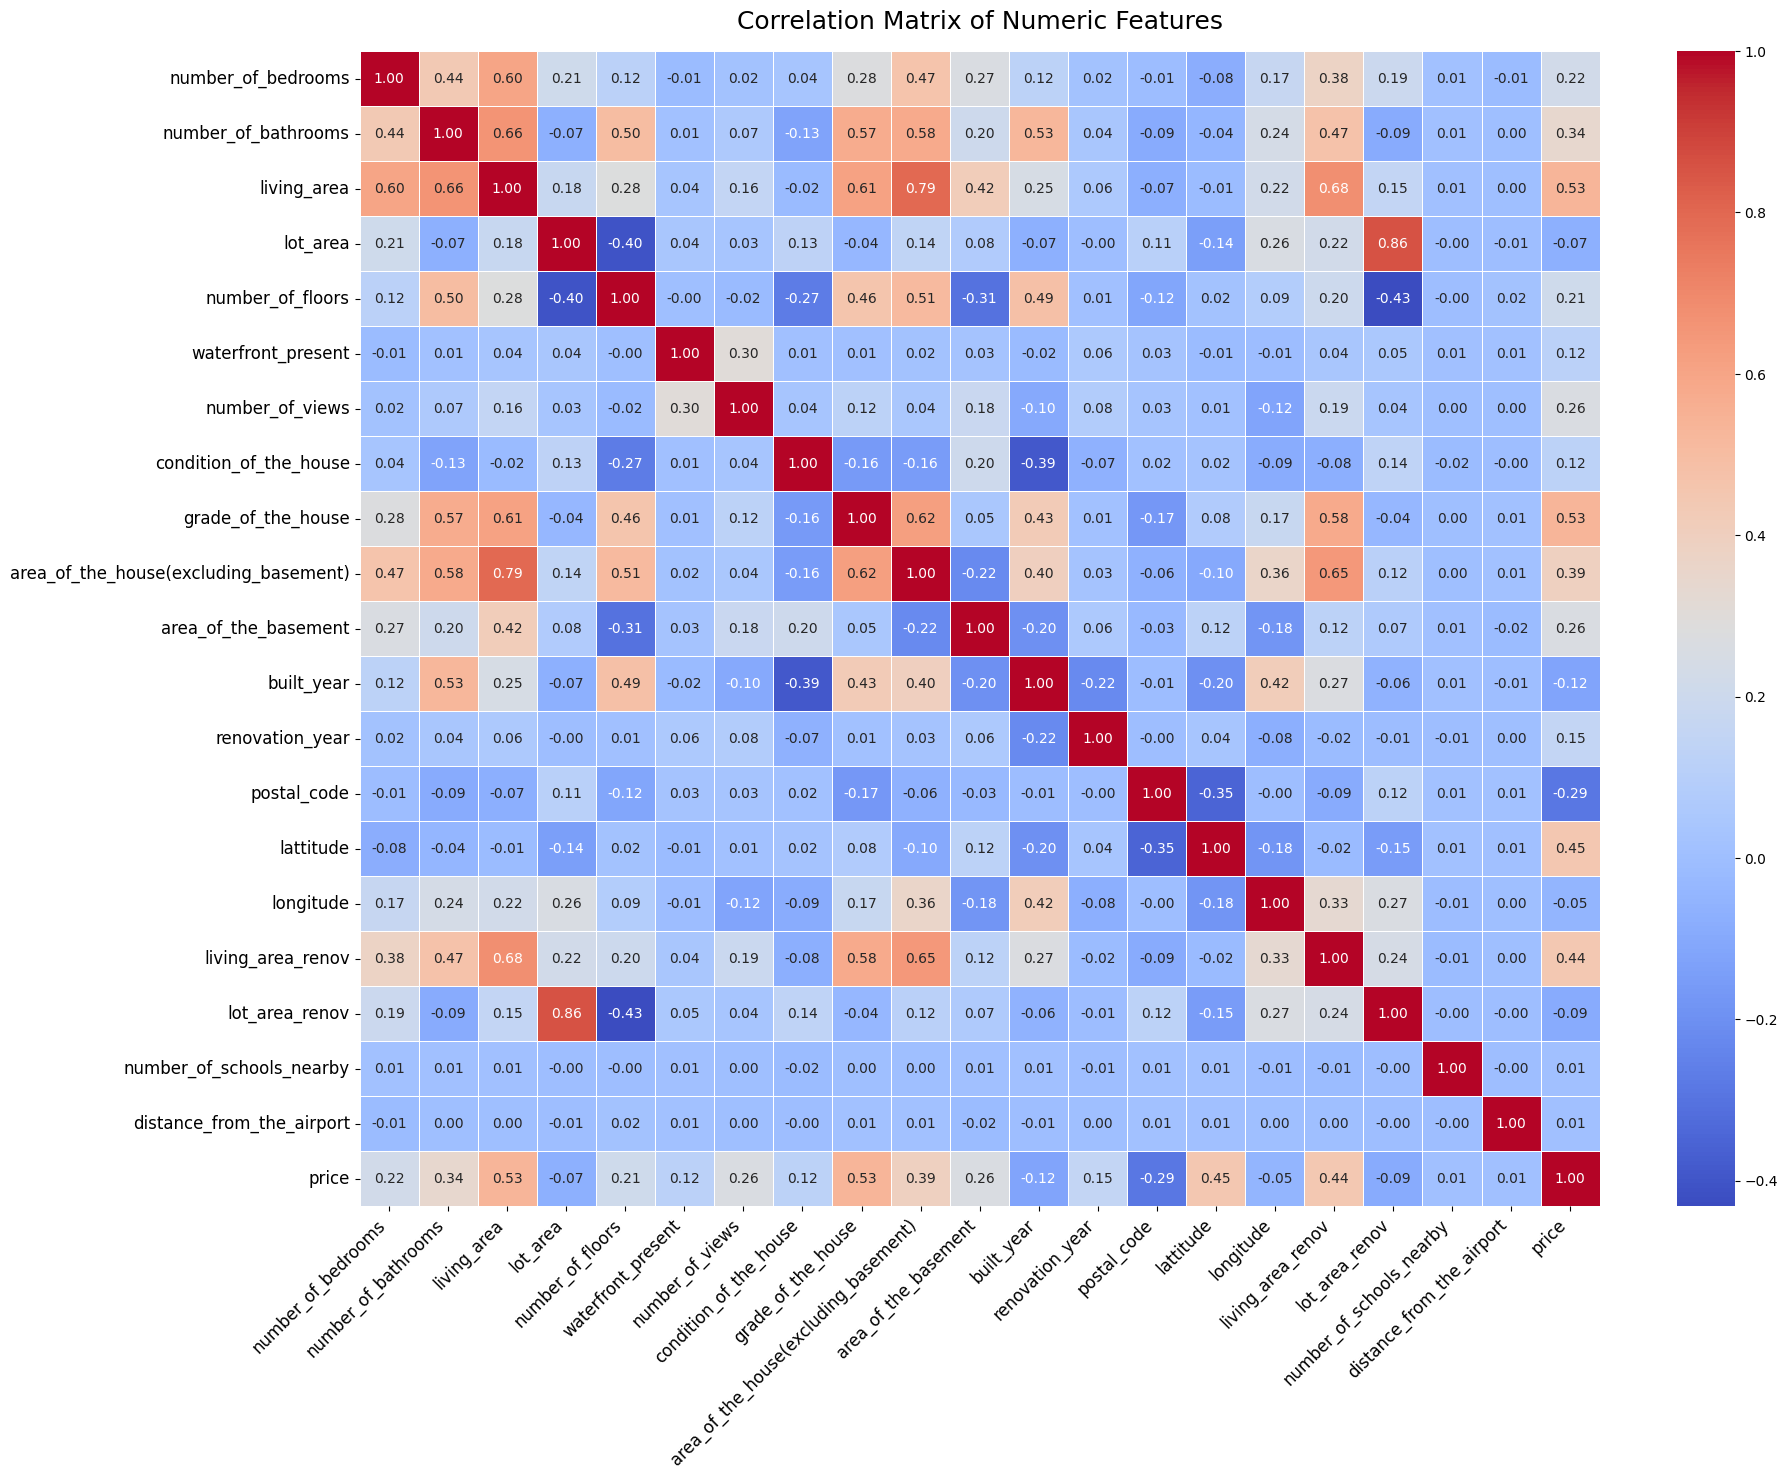

In [50]:
#Denoting a HeatMap to show the Corelation between the variables to better understand our DataFrame.

plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(df_cleaned.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')

# Improve the visualization aesthetics
heatmap.set_title('Correlation Matrix of Numeric Features', fontdict={'fontsize': 18}, pad=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [51]:
# Assuming df is your DataFrame and 'price' is the column of interest
min_price = df_cleaned['price'].min()
max_price = df_cleaned['price'].max()

print(f"Minimum price: {min_price}")
print(f"Maximum price: {max_price}")

Minimum price: 82000
Maximum price: 2000000


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.ensemble import IsolationForest, RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [53]:
# Filter dataset to only include the top features
top_features = [
    'number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area', 'built_year','number_of_floors',
    'grade_of_the_house','number_of_views','postal_code', 'lattitude','longitude', 'living_area_renov', 'lot_area_renov',
    'area_of_the_house(excluding_basement)','area_of_the_basement'
]
X = df_cleaned[top_features]
y = df_cleaned['price']

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

Initial Linear Regression Model

The initial Linear Regression model was trained using the LinearRegression class. The model was fitted on the training data and evaluated on the test data. The Mean Squared Error (MSE) and R² score were calculated to measure the model's performance. The initial Linear Regression model achieved an MSE of 0.2927 and an R² score of 0.7089. Hyperparameter Tuning with GridSearchCV

GridSearchCV was used to tune the fit_intercept parameter of the Linear Regression model. The best parameter found was fit_intercept: False. The Linear Regression model with this parameter achieved a slightly improved MSE of 0.2927 and an R² score of 0.7090.

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Step 1: Train the initial Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Compute MSE and R² for the initial Linear Regression model
lr_mse_initial = mean_squared_error(y_test, lr_predictions)
lr_r2_initial = r2_score(y_test, lr_predictions)
print("Initial Linear Regression MSE:", lr_mse_initial)
print("Initial Linear Regression R² score:", lr_r2_initial)

# Step 2: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'fit_intercept': [True, False]
}

grid_search_lr = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search_lr.fit(X_train, y_train)

# Best parameters
best_params_lr = grid_search_lr.best_params_
print("Best Parameters for Linear Regression:", best_params_lr)

# Step 3: Train the Linear Regression model with best parameters
lr_model_best = LinearRegression(fit_intercept=best_params_lr['fit_intercept'])
lr_model_best.fit(X_train, y_train)
lr_predictions_best = lr_model_best.predict(X_test)

# Compute MSE and R² for the model with best parameters
lr_mse_best = mean_squared_error(y_test, lr_predictions_best)
lr_r2_best = r2_score(y_test, lr_predictions_best)
print("Linear Regression with Best Parameters MSE:", lr_mse_best)
print("Linear Regression with Best Parameters R² score:", lr_r2_best)

Initial Linear Regression MSE: 17149147579.540693
Initial Linear Regression R² score: 0.6309692646021249
Best Parameters for Linear Regression: {'fit_intercept': True}
Linear Regression with Best Parameters MSE: 17149147579.540693
Linear Regression with Best Parameters R² score: 0.6309692646021249


In [56]:
from sklearn.model_selection import cross_val_score
lr_model = LinearRegression(fit_intercept=False)
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
lr_cv_mse = -lr_cv_scores.mean()
print("Cross-Validated Linear Regression MSE:", lr_cv_mse)

Cross-Validated Linear Regression MSE: 14863936740.616375


In [57]:
import pickle
# Save the model to a pickle file
with open('lr_model_best.pkl', 'wb') as f:
    pickle.dump(lr_model_best, f)